In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/flight_delays.csv')

In [3]:
df.head()

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,1,United,4558,ORD,MIA,2024-09-01 08:11,2024-09-01 08:30,2024-09-01 12:11,2024-09-01 12:19,8,Weather,True,False,Boeing 737,N71066,1031
1,2,Delta,8021,LAX,MIA,2024-09-01 10:25,2024-09-01 10:41,2024-09-01 13:25,2024-09-01 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006
2,3,Southwest,7520,DFW,SFO,2024-09-01 16:53,2024-09-01 17:05,2024-09-01 17:53,2024-09-01 18:07,14,Weather,True,True,Boeing 737,N95611,2980
3,4,Delta,2046,ORD,BOS,2024-09-01 14:44,2024-09-01 15:04,2024-09-01 18:44,2024-09-01 18:34,-10,NaN,False,False,Boeing 777,N90029,1408
4,5,Delta,6049,LAX,SEA,2024-09-01 01:51,2024-09-01 02:08,2024-09-01 05:51,2024-09-01 06:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298


In [4]:
df.columns

Index(['FlightID', 'Airline', 'FlightNumber', 'Origin', 'Destination',
       'ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival',
       'ActualArrival', 'DelayMinutes', 'DelayReason', 'Cancelled', 'Diverted',
       'AircraftType', 'TailNumber', 'Distance'],
      dtype='object')

In [5]:
delay_df = df[['Airline','Origin', 'Destination','Cancelled']]

In [6]:
delay_df.head()

,Airline,Origin,Destination,Cancelled
0,United,ORD,MIA,True
1,Delta,LAX,MIA,True
2,Southwest,DFW,SFO,True
3,Delta,ORD,BOS,False
4,Delta,LAX,SEA,False


In [7]:
# Boolean to numeric
delay_df['Cancelled'] = delay_df['Cancelled'].astype(int)


C:\Users\user\AppData\Local\Temp\ipykernel_10320\2608391873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df['Cancelled'] = delay_df['Cancelled'].astype(int)


In [8]:
# Encode categorical variables (Label Encoding)
from sklearn.preprocessing import LabelEncoder

for col in ['Airline', 'Origin', 'Destination']:
    le = LabelEncoder()
    delay_df[col] = le.fit_transform(delay_df[col])
    delay_df[col] = delay_df[col].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_10320\938116907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df[col] = le.fit_transform(delay_df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_10320\938116907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_df[col] = delay_df[col].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_10320\938116907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [9]:
delay_df

,Airline,Origin,Destination,Cancelled
0,3,4,2,1
1,1,3,2,1
2,2,1,4,1
3,1,4,0,0
4,1,3,3,0
...,...,...,...,...
1747622,3,1,2,0
1747623,3,0,3,1
1747624,1,2,4,0
1747625,1,2,3,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
X = pd.get_dummies(df[['Airline', 'Origin', 'Destination']], drop_first=True)
y = df['Cancelled']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[213354 136573]
 [213194 135930]]

Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.61      0.55    349927
        True       0.50      0.39      0.44    349124

    accuracy                           0.50    699051
   macro avg       0.50      0.50      0.49    699051
weighted avg       0.50      0.50      0.49    699051



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


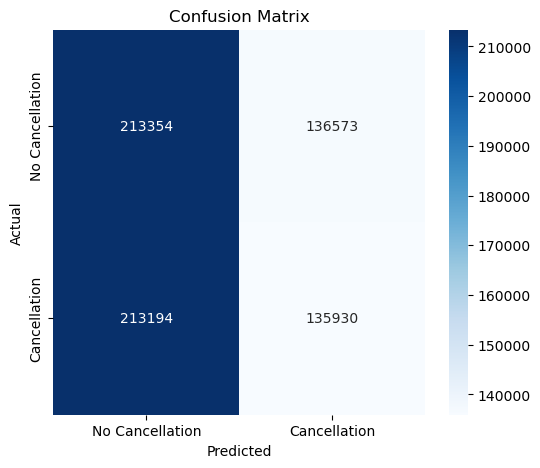

In [17]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancellation', 'Cancellation'], yticklabels=['No Cancellation', 'Cancellation'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# new